# Wine Quality

## 1. Понимание бизнеса

### 1.1 Цель

Предсказание качества вина

### 1.2 Описание

Паоло Кортес с групой коллег преложил прогнозировать вкусовые предпочтения людей в вине на основе физико-химических свойств вина (см. https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377). 
Дата сет состоит из данных по образцам белого и красного вина (vinho verde) из Португалии.

В задаче необходимо построить модель классификации, отвечающую за автоматическое предсказание качества вина на основе свойств. Модель может быть полезна как часть процесса сертификации и может использоваться для улучшения виноделия (путем выявления наиболее влияющих факторов и инвестирования в них), а также для установления цен на вино.


Описание датасета на Kaggle (см. https://www.kaggle.com/rajyellow46/wine-quality)

## 2. Data Understanding

### 2.1 Import Libraries

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold,cross_val_score

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import f1_score, accuracy_score,classification_report, confusion_matrix
from pylab import rcParams
import pickle

### 2.2 Загрузка данных

In [2]:
df = pd.read_csv('winequalityN.csv')

### 2.3 Статистика и визуализация

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### Описание переменных

Input variables (based on physicochemical tests):
>1 - fixed acidity - фиксированная кислотность<br>
2 - volatile acidity - летучая кислотность<br>
3 - citric acid - лимонная кислота<br>
4 - residual sugar - остаточный сахар<br>
5 - chlorides - хлориды<br>
6 - free sulfur dioxide - свободный диоксид серы<br>
7 - total sulfur dioxide - диоксид серы общий<br>
8 - density - плотность<br>
9 - pH - pH<br>
10 - sulphates - сульфаты<br>
11 - alcohol - алкоголь<br>

Output variable (based on sensory data):<br>
>12 - quality - качество(score between 0 and 10)

#### 2.3.1 Информация о переменных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
# количество образцов вина по типу
df.groupby('type').type.count()

type
red      1359
white    3970
Name: type, dtype: int64

#### 2.3.2 Визуализация

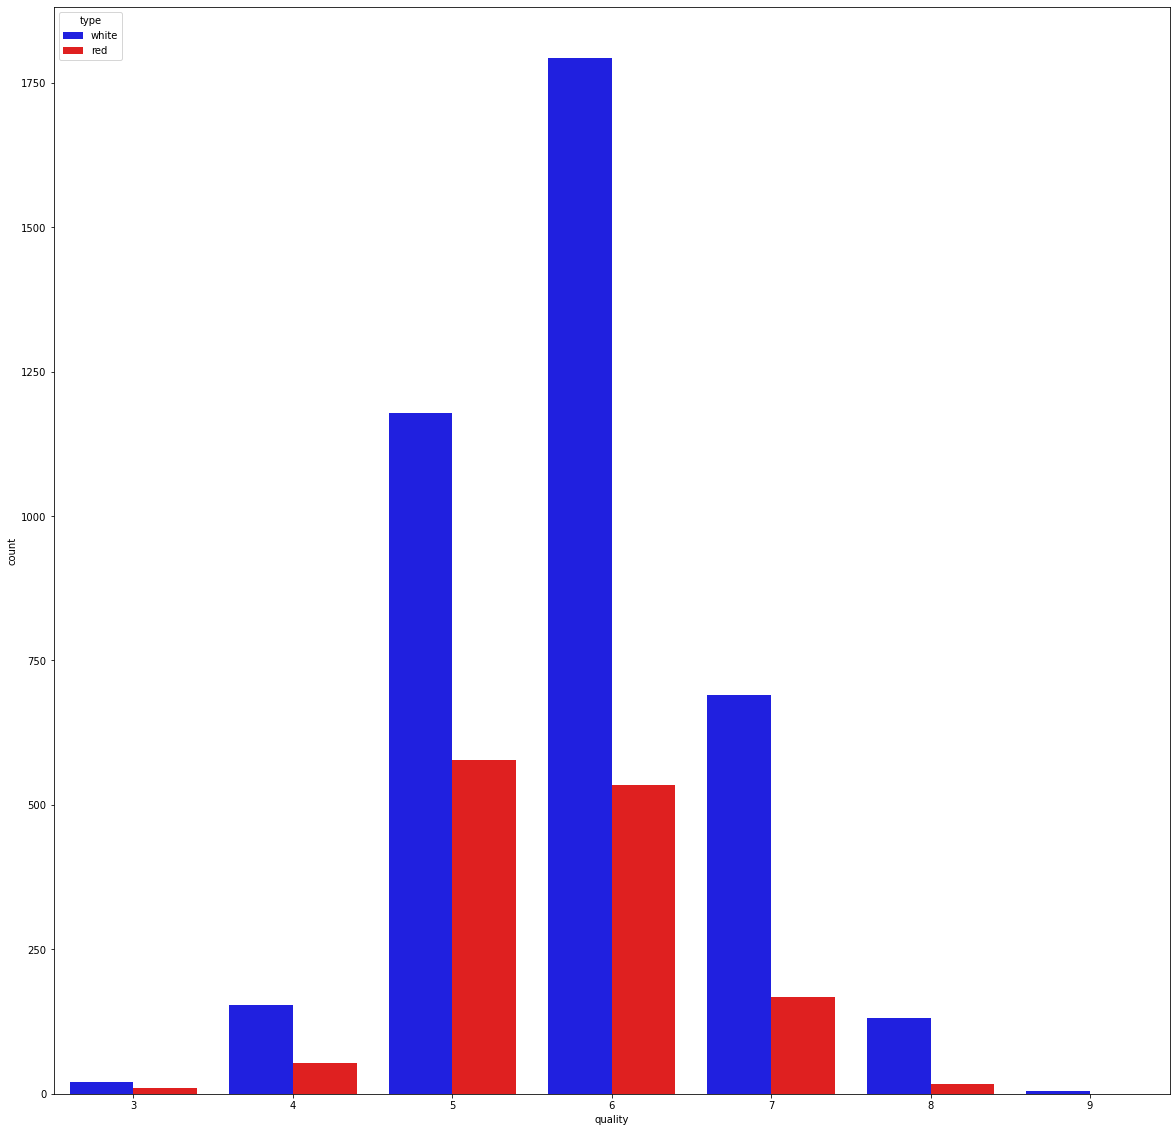

In [8]:
rcParams['figure.figsize'] = 20,20
sns.countplot(x='quality',hue='type', data=df, palette= ['blue', 'red'])
plt.show()

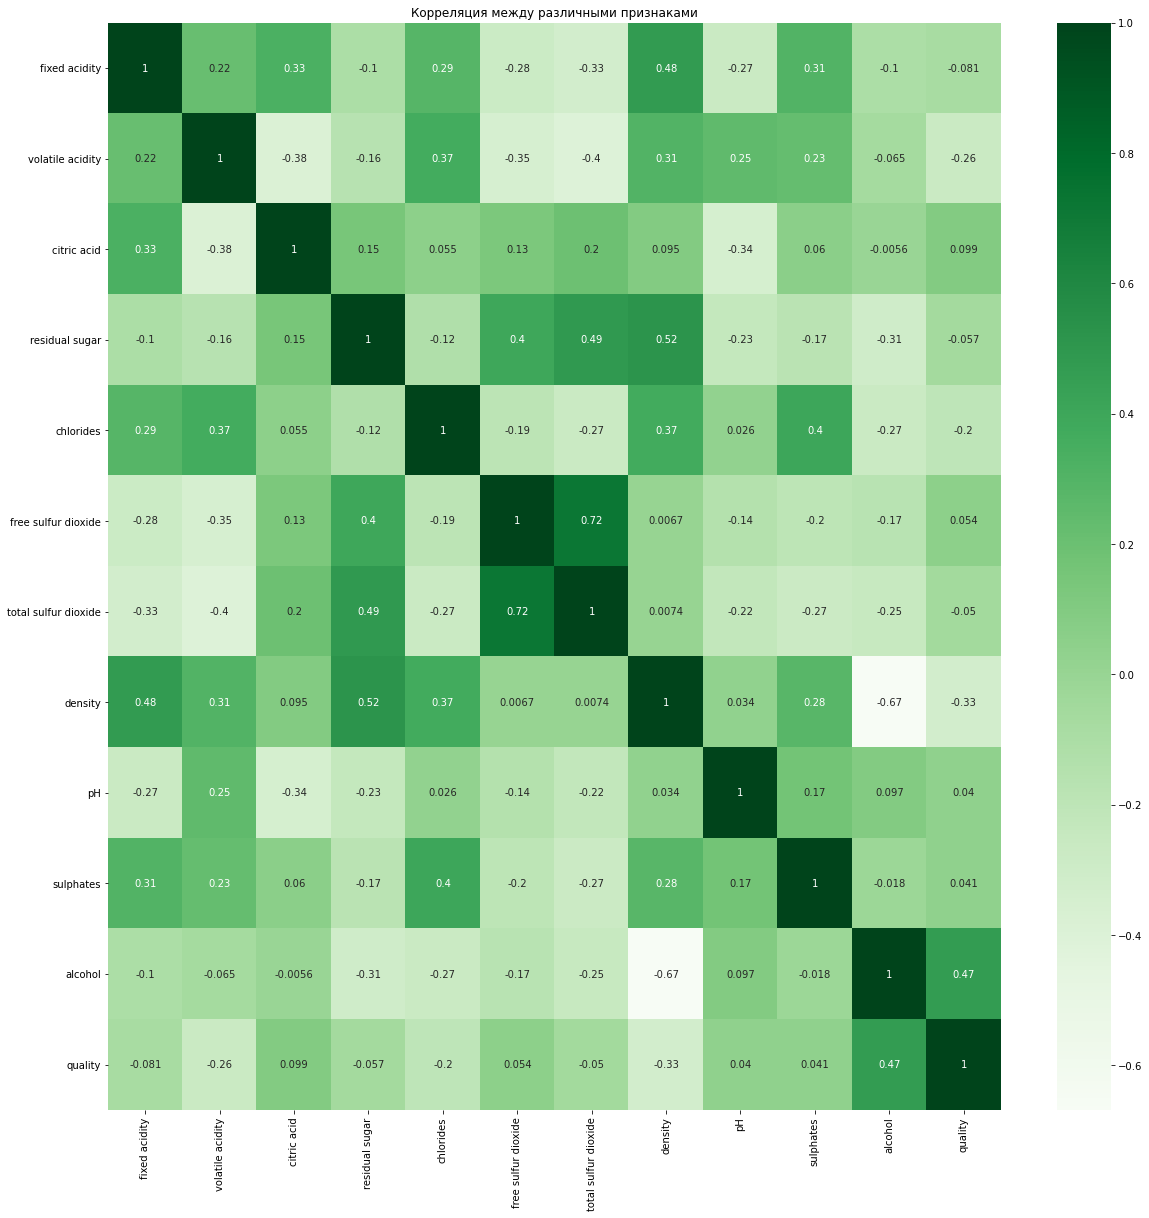

In [9]:
# посмотрим на корреляцию числовых признаков
sns.heatmap(df.corr(), cmap='Greens', annot=True).set_title('Корреляция между различными признаками')
plt.show()
# очевидной зависимости между качеством и остальными признаками не прослеживается (кроме алкоголя)

## 3. Data Preparation

### 3.1 Преобразование категориальных переменных в числовые

In [10]:
# 
le = LabelEncoder()
df.type = le.fit_transform(df.type.values)

In [11]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,1,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


### 3.2 Заполнение пропусков

In [12]:
# посмотрим на количество пропусков в признаках
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [13]:
# предположим, что средние значения признаков зависят от типа вина
print(df.groupby(['type'])['fixed acidity'].mean())
print(df.groupby(['type'])['volatile acidity'].mean())
print(df.groupby(['type'])['citric acid'].mean())
print(df.groupby(['type'])['chlorides'].mean())
print(df.groupby(['type'])['pH'].mean())
print(df.groupby(['type'])['sulphates'].mean())

type
0    8.313486
1    6.840876
Name: fixed acidity, dtype: float64
type
0    0.529381
1    0.280641
Name: volatile acidity, dtype: float64
type
0    0.272533
1    0.334551
Name: citric acid, dtype: float64
type
0    0.088124
1    0.045895
Name: chlorides, dtype: float64
type
0    3.309492
1    3.195309
Name: pH, dtype: float64
type
0    0.658622
1    0.490398
Name: sulphates, dtype: float64


In [14]:
# заполним пропущенны значения признаков средними значениями в зависимости от типа
# создадим копию датафрейма
df_fillna = df.copy()

df_fillna['fixed acidity'] = df['fixed acidity'].fillna(df.groupby(['type'])['fixed acidity'].transform('mean'))
df_fillna['volatile acidity'] = df['volatile acidity'].fillna(df.groupby(['type'])['volatile acidity'].transform('mean'))
df_fillna['citric acid'] = df['citric acid'].fillna(df.groupby(['type'])['citric acid'].transform('mean'))
df_fillna['chlorides'] = df['chlorides'].fillna(df.groupby(['type'])['chlorides'].transform('mean'))
df_fillna['pH'] = df['pH'].fillna(df.groupby(['type'])['pH'].transform('mean'))
df_fillna['sulphates'] = df['sulphates'].fillna(df.groupby(['type'])['sulphates'].transform('mean'))
df_fillna['residual sugar'] = df['residual sugar'].fillna(df.groupby(['type'])['residual sugar'].transform('mean'))

In [15]:
df_fillna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5329 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  5329 non-null   int32  
 1   fixed acidity         5329 non-null   float64
 2   volatile acidity      5329 non-null   float64
 3   citric acid           5329 non-null   float64
 4   residual sugar        5329 non-null   float64
 5   chlorides             5329 non-null   float64
 6   free sulfur dioxide   5329 non-null   float64
 7   total sulfur dioxide  5329 non-null   float64
 8   density               5329 non-null   float64
 9   pH                    5329 non-null   float64
 10  sulphates             5329 non-null   float64
 11  alcohol               5329 non-null   float64
 12  quality               5329 non-null   int64  
dtypes: float64(11), int32(1), int64(1)
memory usage: 722.0 KB


In [50]:
df_fillna.to_csv('winequalityN_fillna.csv', index = False)

### 3.3 Формирование итогового датасета

In [16]:
# посмотрим количество элементов в предсказываемых классах
# количество образцов вина по качеству
df_fillna.groupby('quality').quality.count()

quality
3      30
4     206
5    1755
6    2327
7     857
8     149
9       5
Name: quality, dtype: int64

Классы сильно несбалансинованы, разделим оценки на группы: 
>"низкое качество" (оценка 3 и 4), метка - 1 <br>
"среднее качество" (оценка 5 и 6), метка - 2 <br>
"качество выше среднего" (оценка 7), метка - 3 <br>
"высокое качество" (оценка 8 и 9), метка - 4 <br>

In [17]:
# вспомогательная функция для перевода оценки качества на новые классы
def quality(val):
    if val <=4:
        return 1
    elif val == 7:
        return 3
    elif val >=8:
        return 4
    else:
        return 2

In [18]:
# создадим новый датафрейм с новой оценкой качества
df_mod = df_fillna.copy()
df_mod['quality'] = df_mod['quality'].apply(quality)

In [23]:
df_mod.groupby('quality').quality.count()

quality
1     236
2    4082
3     857
4     154
Name: quality, dtype: int64

In [24]:
#для итогового датасета выберем случайным образом по 250 образцов среднего и выше среднего качества (удалим лишние наблюдения)
df_mod = df_mod.drop(df_mod[df_mod['quality'] == 2].sample(3832).index)
df_mod = df_mod.drop(df_mod[df_mod['quality'] == 3].sample(607).index)

In [25]:
# классы примерно сбалансированы
df_mod.groupby('quality').quality.count()

quality
1    236
2    250
3    250
4    154
Name: quality, dtype: int64

In [51]:
# выгрузим финальный датасет, на котором будем строить модели
df_mod.to_csv('winequalityN_final.csv', index = False)

In [26]:
# разделим признаки и целевую переменную
X = df_mod.drop('quality', axis = True)
y = df_mod['quality']

In [27]:
# разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((712, 12), (178, 12), (712,), (178,))

In [29]:
# масштабируем признаки 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 4. Моделирование


### 4.1 Выбор модели

In [33]:
model_lr =  LogisticRegression()
model_rf = RandomForestClassifier()
model_ab = AdaBoostClassifier()
model_dt = DecisionTreeClassifier()

### 4.2 Обучение моделей

In [34]:
model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_ab.fit(X_train, y_train)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

## 5. Оценка

In [35]:
y_pred = model_lr.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))
# хуже всего ожидаемо предсказывается класс с высокими оценками (можно предположить, что влияет субъективность оценки, 
# можно вносить в модель помимо физико-химических свойств эстетические характеристики: бокалы, место оценки, температуру вина и много всего другого)

              precision    recall  f1-score   support

           1       0.71      0.59      0.64        46
           2       0.53      0.55      0.54        51
           3       0.51      0.75      0.61        48
           4       0.56      0.27      0.37        33

    accuracy                           0.56       178
   macro avg       0.58      0.54      0.54       178
weighted avg       0.58      0.56      0.55       178



In [36]:
y_pred = model_rf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           1       0.67      0.74      0.70        46
           2       0.60      0.53      0.56        51
           3       0.44      0.58      0.50        48
           4       0.42      0.24      0.31        33

    accuracy                           0.54       178
   macro avg       0.53      0.52      0.52       178
weighted avg       0.54      0.54      0.54       178



In [37]:
y_pred = model_ab.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           1       0.62      0.57      0.59        46
           2       0.51      0.49      0.50        51
           3       0.47      0.38      0.42        48
           4       0.39      0.58      0.46        33

    accuracy                           0.49       178
   macro avg       0.50      0.50      0.49       178
weighted avg       0.51      0.49      0.49       178



In [38]:
y_pred = model_dt.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           1       0.67      0.70      0.68        46
           2       0.55      0.53      0.54        51
           3       0.43      0.44      0.43        48
           4       0.38      0.36      0.37        33

    accuracy                           0.52       178
   macro avg       0.51      0.51      0.51       178
weighted avg       0.52      0.52      0.52       178



Все модели показывают среднее качество (предполагаем это из-за того, что сильно ограничили выборку, удалив образцы из больших классов. Можно повторить моделирование, добавив синтетические данные в маленькие классы.

Выбор модели должен зависеть от задачи, если в настоящее время очень много отрицательных отзывов по продукции, страдает репутация бренда, то нужна модель, которая наиболее хорошо предсказывает класс с низким качеством, чтобы не допускать такой продукт на рынок. Выбираем модель Случайного леса, предсказывающую низкий класс с f1 = 70%.

Если заказчкик стремится перейти на рынок люксовых брендов, то выбираем модель AdaBoost, предсказывающую оценку высокого качества с f1 = 46% (наибольшую из всех в данной учебной работе).

В данной учебной задаче выбираем для развертывания модель логистической регрессии, в среднем предсказывающую лучше по всем классам.

## 6. Развертывание

In [45]:
# сохраняем модель логистической в файл 
filename = 'model_lr.sav'
pickle.dump(model_lr, open(filename, 'wb'))


In [46]:
# потом для использования нужно загрузить сохраненную модель
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.5617977528089888


In [48]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
